# Part I - New York City Bike-Sharing Project
## by Le Sy Khanh Duy

## Table of Contents
- [Introduction](#Introduction)
- [Data Gathering](#data_gathering)
- [Data Assessing](#data_assessing)
- [Data Cleaning](#data_cleaning)
- [Read Data](#read_data)
- [Univariate](#univariate)
- [Bivariate](#bivariate)
- [Multivariate](#multivariate)
- [Conclusions](#conclusions)

## Introduction
> This document explores dataset includes over 6,923,547 records about New York Bike-Sharing Services.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
from io import BytesIO
from zipfile import ZipFile
%matplotlib inline

#### Useful Functions

In [2]:
# remove outlier.
def remove_outlier(_df, col_name):
    """
    remove outliers
    """
    q1 = _df[col_name].quantile(0.25)
    q3 = _df[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = _df.loc[(_df[col_name] > fence_low) & (_df[col_name] < fence_high)]
    return df_out

In [3]:
# Name of week days.
week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

<a id='data_gathering'></a>
### Data Gathering

In [4]:
# download zip files
for i in range(1,13):
    month = str(i).zfill(2)
    url = f'https://s3.amazonaws.com/tripdata/2020{month}-citibike-tripdata.csv.zip'
    r = requests.get(url)
    with open(os.path.basename(url), 'wb') as f:
        f.write(r.content)
    print(url)

https://s3.amazonaws.com/tripdata/202001-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202002-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202003-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202004-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202005-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202006-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202007-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202008-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202009-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202010-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202011-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202012-citibike-tripdata.csv.zip


In [5]:
# open files
dfs = []
for i in range(1,13):
    month = str(i).zfill(2)
    csv_file_name = f'2020{month}-citibike-tripdata.csv'
    zip_file_name = csv_file_name + '.zip' 
    print(zip_file_name)
    with ZipFile(zip_file_name) as z:
        with z.open(csv_file_name) as f:
            df = pd.read_csv(f)
            dfs.append(df)
            

202001-citibike-tripdata.csv.zip
202002-citibike-tripdata.csv.zip
202003-citibike-tripdata.csv.zip
202004-citibike-tripdata.csv.zip
202005-citibike-tripdata.csv.zip
202006-citibike-tripdata.csv.zip
202007-citibike-tripdata.csv.zip
202008-citibike-tripdata.csv.zip
202009-citibike-tripdata.csv.zip
202010-citibike-tripdata.csv.zip
202011-citibike-tripdata.csv.zip
202012-citibike-tripdata.csv.zip


<a id='data_assessing'></a>
### Data Assessing

> Because data of 1 year is too big, it is imposible to loads all data to 1 dataframe
>so I only get 3 months data to analysis


In [6]:
# merge files into one dataframe
df = pd.concat(dfs[6:9], ignore_index = True, sort = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923547 entries, 0 to 6923546
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 792.3+ MB


In [7]:
df.shape

(6923547, 15)

In [8]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06,6.923547e+06
mean,1.444925e+03,2.081525e+03,4.074065e+01,-7.397643e+01,2.074961e+03,4.074022e+01,-7.397660e+01,3.524963e+04,1.981765e+03,1.171066e+00
std,1.741188e+04,1.546202e+03,3.568121e-02,2.367037e-02,1.546936e+03,3.559172e-02,2.375061e-02,9.101057e+03,1.227248e+01,6.307215e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.407146e+01,1.452900e+04,1.873000e+03,0.000000e+00
25%,4.680000e+02,4.260000e+02,4.071608e+01,-7.399392e+01,4.260000e+02,4.071602e+01,-7.399400e+01,2.909000e+04,1.969000e+03,1.000000e+00
50%,8.540000e+02,3.100000e+03,4.073936e+01,-7.398101e+01,3.095000e+03,4.073902e+01,-7.398130e+01,3.780400e+04,1.985000e+03,1.000000e+00
75%,1.485000e+03,3.507000e+03,4.076395e+01,-7.395939e+01,3.503000e+03,4.076371e+01,-7.395939e+01,4.280200e+04,1.992000e+03,2.000000e+00
max,3.522382e+06,4.202000e+03,4.085225e+01,-7.388827e+01,4.202000e+03,4.085225e+01,-7.388827e+01,4.785500e+04,2.004000e+03,2.000000e+00


In [9]:
df.tripduration.value_counts()

401        5584
383        5560
392        5529
393        5525
350        5504
422        5502
402        5500
380        5483
429        5466
407        5465
409        5463
405        5459
381        5453
442        5442
425        5441
390        5439
344        5439
351        5438
370        5437
343        5436
415        5434
376        5433
382        5431
399        5431
481        5430
448        5430
391        5429
346        5429
436        5428
456        5427
           ... 
10121         1
34717         1
251886        1
79794         1
18332         1
30618         1
24197         1
10128         1
92095         1
18331         1
14229         1
18330         1
14228         1
726768        1
22427         1
18329         1
14231         1
30622         1
26524         1
14230         1
55178         1
558720        1
20102         1
14217         1
38812         1
18310         1
1938492       1
145355        1
112571        1
14251         1
Name: tripduration, Leng

In [10]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [11]:
df.bikeid.nunique()

20718

In [12]:
df.duplicated().sum()

0

In [13]:
df['start station name'].value_counts()

12 Ave & W 40 St                            39901
West St & Chambers St                       38789
W 21 St & 6 Ave                             35790
1 Ave & E 68 St                             35597
Pier 40 - Hudson River Park                 32992
Christopher St & Greenwich St               31864
Broadway & W 60 St                          31700
West St & Liberty St                        29719
E 17 St & Broadway                          29323
E 13 St & Avenue A                          29092
FDR Drive & E 35 St                         27955
Carmine St & 6 Ave                          27532
Broadway & E 22 St                          26212
Broadway & W 25 St                          25513
E 33 St & 1 Ave                             25420
Grand St & Elizabeth St                     25342
Cleveland Pl & Spring St                    25209
Broadway & E 14 St                          24822
Central Park S & 6 Ave                      24345
Little West St & 1 Pl                       24027


In [14]:
df['start station name'].nunique(), df['end station name'].nunique() 

(1104, 1136)

In [15]:
df['start station id'].nunique(), df['end station id'].nunique() 

(1104, 1136)

In [16]:
df.gender.value_counts()

1    3966686
2    2070622
0     886239
Name: gender, dtype: int64

In [17]:
df.usertype.value_counts()

Subscriber    5020570
Customer      1902977
Name: usertype, dtype: int64

In [18]:
# check min max age
df['birth year'].agg({'min','max','average','median'})

max        2004.000000
min        1873.000000
average    1981.765214
median     1985.000000
Name: birth year, dtype: float64

In [19]:
sorted(df['birth year'].unique())

[1873,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1905,
 1907,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004]

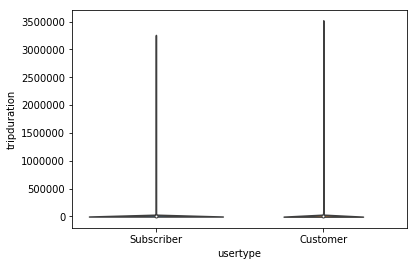

In [20]:
ax = sb.violinplot(x="usertype", y="tripduration", data=df)

### What is the structure of your dataset?

* There are 6,923,547 bike trips in New York city from 2020-07 to 2020-09 merged into one dataframe.
* The dataset contains information about trip (trip lenght in seconds, start time, end time), station , user(birth year, gender)

### What is/are the main feature(s) of interest in your dataset?

* Time range that most trip taken (base on month, weekday, hour)?
* Find out routine of user base on their gender, age, usertype ( example : older user will go out earlier )
* which station is the most popular for bike trip ?
* the most popular length of trips base on gender, age, usertype

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Trip duration (in seconds)
* Start time
* End time
* User Type
* Birth year (Age)
* Gender


### Quality Issues:
* start time, end time have wrong data type (string/object). It should be datetime.
* bikeid has wrong data type (int64), it should be string , because we don't need to calculate math on bikeid.
* gender have wrong data type . It should be Category to save memory.
* usertype have wrong data type . It should be Category to save memory.

* add some useful columns for analysis.( age, trip_month, week_day , start_hour, end_hour,
* remove some columns that will not be used.(bikeid, start station latitude ,start station longitude ,end station latitude, end station longitude)
* there are some users over 100 years old. That seems not real. So I will remove all outliers.
* there are some outliers in tripduration.

### Tidiness Issues:
* None

### Store Data

In [21]:
clean_df = df.copy()

<a id='data_cleaning'></a>
### Data Cleaning

#### Define
* remove some columns that will not be used.(bikeid, start station latitude ,start station longitude ,end station latitude, end station longitude)

#### Code

In [22]:
clean_df.drop(['start station id', 'start station latitude','start station longitude','end station id', 'end station latitude','end station longitude'], axis = 1, inplace = True) 

#### Test

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923547 entries, 0 to 6923546
Data columns (total 9 columns):
tripduration          int64
starttime             object
stoptime              object
start station name    object
end station name      object
bikeid                int64
usertype              object
birth year            int64
gender                int64
dtypes: int64(4), object(5)
memory usage: 475.4+ MB


#### Define
* start time, end time have wrong data type (string/object). It should be datetime.
* bikeid has wrong data type (int64), it should be string , because we don't need to calculate math on bikeid.
* gender have wrong data type . It should be Category to save memory.
* usertype have wrong data type . It should be Category to save memory.

#### Code

In [24]:
clean_df['starttime'] = pd.to_datetime(clean_df['starttime'])
clean_df['stoptime'] = pd.to_datetime(clean_df['stoptime'])
clean_df['bikeid'] = clean_df['bikeid'].astype('str')
clean_df['gender'] = clean_df['gender'].astype('category')
clean_df['usertype'] = clean_df['usertype'].astype('category')

#### Test

In [25]:
clean_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923547 entries, 0 to 6923546
Data columns (total 9 columns):
tripduration          int64
starttime             datetime64[ns]
stoptime              datetime64[ns]
start station name    object
end station name      object
bikeid                object
usertype              category
birth year            int64
gender                category
dtypes: category(2), datetime64[ns](2), int64(2), object(3)
memory usage: 383.0+ MB


#### Define
* add some useful columns for analysis.( age, trip_month, week_day , start_hour, end_hour, duration_min)

#### Code

In [26]:
# add some useful columns
clean_df['age'] = 2020 - clean_df['birth year']
clean_df['trip_month'] = clean_df['starttime'].dt.month.astype(int)
# week days
clean_df['week_day']  = clean_df['starttime'].dt.strftime('%a')
clean_df['week_day'] = pd.Categorical(clean_df['week_day'], ordered=True, categories=week_days)
clean_df['start_hour'] = clean_df['starttime'].dt.hour.astype(int)
clean_df['end_hour'] = clean_df['stoptime'].dt.hour.astype(int)
# duration in minutes
clean_df['duration_min'] = clean_df['tripduration'] / 60

#### Test

In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923547 entries, 0 to 6923546
Data columns (total 15 columns):
tripduration          int64
starttime             datetime64[ns]
stoptime              datetime64[ns]
start station name    object
end station name      object
bikeid                object
usertype              category
birth year            int64
gender                category
age                   int64
trip_month            int64
week_day              category
start_hour            int64
end_hour              int64
duration_min          float64
dtypes: category(3), datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 653.7+ MB


In [28]:
clean_df.sample(10)

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,age,trip_month,week_day,start_hour,end_hour,duration_min
2719730,1794,2020-08-09 13:59:17.762,2020-08-09 14:29:12.533,W 30 St & 10 Ave,Greenwich St & W Houston St,37050,Customer,2001,1,19,8,Sun,13,14,29.900000
4655893,457,2020-09-04 06:25:25.260,2020-09-04 06:33:02.749,6 Ave & W 33 St,W 52 St & 6 Ave,40639,Subscriber,1992,1,28,9,Fri,6,6,7.616667
6530647,274,2020-09-26 10:51:52.987,2020-09-26 10:56:27.725,W 40 St & 5 Ave,5 Ave & E 29 St,47236,Customer,1969,0,51,9,Sat,10,10,4.566667
6629803,2890,2020-09-27 11:22:57.025,2020-09-27 12:11:07.206,West St & Liberty St,West Thames St,40954,Subscriber,1969,2,51,9,Sun,11,12,48.166667
4121583,1836,2020-08-28 07:01:00.741,2020-08-28 07:31:37.642,12 Ave & W 125 St,12 Ave & W 125 St,28153,Subscriber,1962,1,58,8,Fri,7,7,30.600000
2535259,399,2020-08-06 22:46:50.050,2020-08-06 22:53:29.233,8 Ave & W 31 St,9 Ave & W 18 St,25921,Subscriber,1974,1,46,8,Thu,22,22,6.650000
723087,1182,2020-07-12 16:12:37.820,2020-07-12 16:32:20.690,Allen St & Rivington St,Maiden Ln & Pearl St,32805,Customer,1969,0,51,7,Sun,16,16,19.700000
5414681,239,2020-09-13 09:02:38.318,2020-09-13 09:06:37.471,31 St & Broadway,31 St & Newtown Ave,43041,Subscriber,1978,1,42,9,Sun,9,9,3.983333
2141037,850,2020-08-01 14:01:40.015,2020-08-01 14:15:50.058,Central Park West & W 72 St,5 Ave & E 88 St,34042,Subscriber,1975,2,45,8,Sat,14,14,14.166667
4080205,1813,2020-08-27 14:48:32.120,2020-08-27 15:18:45.867,Southpoint Park,34 Ave & 13 St,20113,Subscriber,1988,2,32,8,Thu,14,15,30.216667


#### Define
* remove outlier in age column

#### Code

In [29]:
clean_df.age.agg(['min','max'])

min     16
max    147
Name: age, dtype: int64

In [30]:
clean_df = remove_outlier(clean_df,'age')

#### Test

In [31]:
clean_df.age.agg(['min','max'])

min    16
max    85
Name: age, dtype: int64

### Define
* remove outlier in tripduration

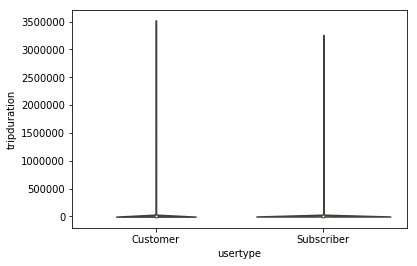

In [32]:
sb.violinplot(x="usertype", y="tripduration", data=clean_df)

### Code

In [33]:
clean_df = remove_outlier(clean_df,'tripduration')

### Test

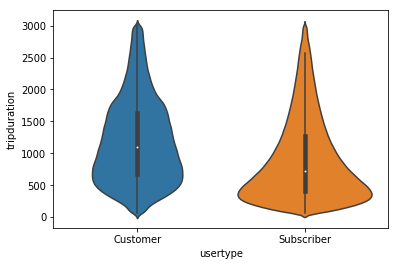

In [34]:
sb.violinplot(x="usertype", y="tripduration", data=clean_df)

### Store Data

In [35]:
clean_df.to_csv('cleaned-citibike-tripdata_month-20207-to-202009.csv', index = False)

In [36]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
len_dfs = [len(_df) for _df in dfs]
monthly_count_df = pd.DataFrame({'month':months,'trip_count':len_dfs})

In [37]:
monthly_count_df.to_csv('2020-monthly-count.csv', index = False)

<a id='read_data'></a>
### Read Data

In [38]:
# read 3 months dataset
clean_df = pd.read_csv('cleaned-citibike-tripdata_month-20207-to-202009.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650598 entries, 0 to 6650597
Data columns (total 15 columns):
tripduration          int64
starttime             object
stoptime              object
start station name    object
end station name      object
bikeid                int64
usertype              object
birth year            int64
gender                int64
age                   int64
trip_month            int64
week_day              object
start_hour            int64
end_hour              int64
duration_min          float64
dtypes: float64(1), int64(8), object(6)
memory usage: 761.1+ MB


In [39]:
# read 12 months trip count dataset
months_df = pd.read_csv('2020-monthly-count.csv')
months_df

,month,trip_count
0,January,1240596
1,February,1146830
2,March,1068457
3,April,682762
4,May,1487890
5,June,1882273
6,July,2105808
7,August,2329514
8,September,2488225
9,October,2248869


<a id='univariate'></a>
## Univariate Exploration


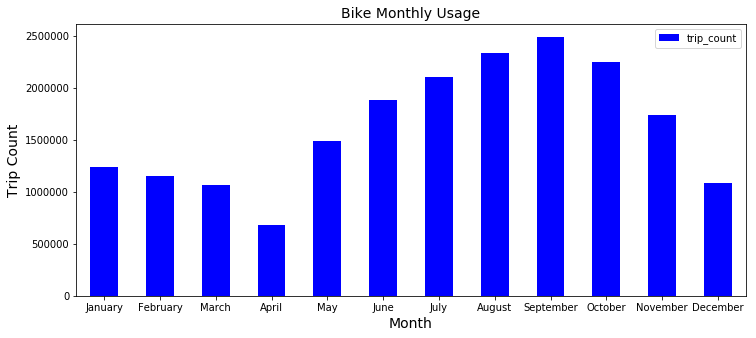

In [40]:
month_bar = months_df.set_index('month').plot.bar(color='blue')
month_bar.figure.set_size_inches(12, 5);
plt.title('Bike Monthly Usage',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Trip Count',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('monthly-trip-count-bar-chart.png', bbox_inches='tight')

> Number of trips in September is highest.
>
> Number of trips in April is lowest.
>
> We can see that Bike Usage increase in Summer (April~September), and decrease in winter.
>
>We can guess that in summer tourism come to New York, and in winter due to bad weather people don't like to use bike. 

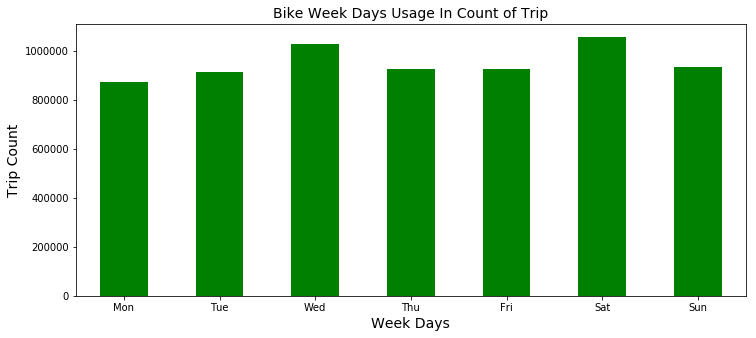

In [41]:
week_day_bar = clean_df['week_day'].value_counts().reindex(week_days).plot.bar(color='green',)
week_day_bar.figure.set_size_inches(12, 5);
plt.title('Bike Week Days Usage In Count of Trip',fontsize=14)
plt.xlabel('Week Days',fontsize=14)
plt.ylabel('Trip Count',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('Bike-Week-Days-Usage-Count-Trip.png', bbox_inches='tight')

>The highest usage of the bikes is in Weekend, it is probably used to travel/tourist.

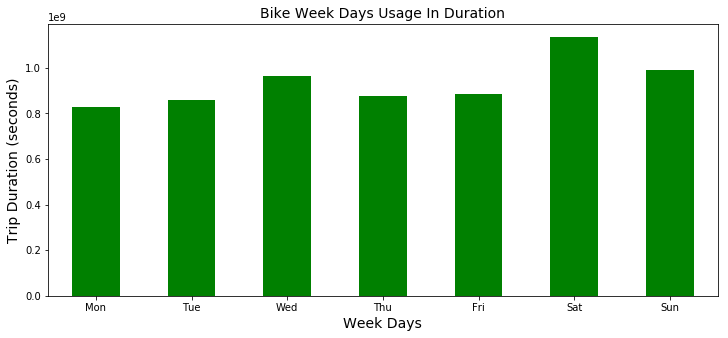

In [42]:
week_day_bar = clean_df.groupby(['week_day'])['tripduration'].sum().reindex(week_days).plot.bar(color='green',)
week_day_bar.figure.set_size_inches(12, 5);
plt.title('Bike Week Days Usage In Duration',fontsize=14)
plt.xlabel('Week Days',fontsize=14)
plt.ylabel('Trip Duration (seconds)',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('Bike-Week-Days-Usage-Duration.png', bbox_inches='tight')

> In case of trip duration , weekend is still the hightest usage time.

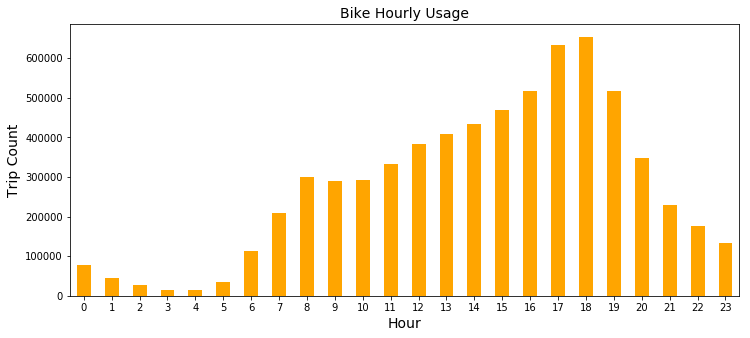

In [43]:
hour_day_bar = clean_df['start_hour'].value_counts().sort_index().plot.bar(color='orange')
hour_day_bar.figure.set_size_inches(12, 5);
plt.title('Bike Hourly Usage',fontsize=14)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Trip Count',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('Bike-Hourly-Usage-Duration.png', bbox_inches='tight')

> The peak are around 5PM-6PM. this time is when people get back home from work. I can guess that many people use bike to avoid traffic jam and get back home from work.

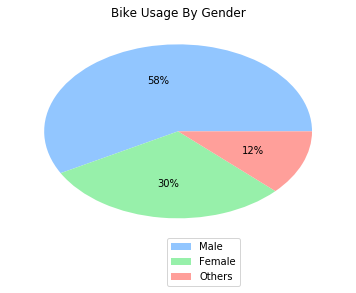

In [44]:
genders = ['Male', 'Female', 'Others']
colors = sb.color_palette('pastel')[0:5]
series = clean_df.gender.value_counts().reindex([1,2,0])
plt.pie(series,labels=None, colors = colors ,autopct='%.0f%%')
plt.title('Bike Usage By Gender')
plt.legend( genders, loc='center right', bbox_to_anchor=(0.7, -0.1), fontsize = 10)
plt.savefig('Bike-Usage-By-Gender.png', bbox_inches='tight')

> Male usage count is nearly 2 times more than female.

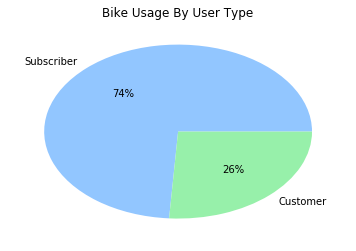

In [45]:
colors = sb.color_palette('pastel')[0:5]
series = clean_df.usertype.value_counts()
plt.pie(series,labels=series.index, colors = colors ,autopct='%.0f%%')
plt.title('Bike Usage By User Type')
#plt.legend( labels, loc='center right', bbox_to_anchor=(0.7, -0.1), fontsize = 10)
plt.savefig('Bike-Usage-By-User-Type.png', bbox_inches='tight')

> Subcriber trips are nearly 3 times more than Customers.  

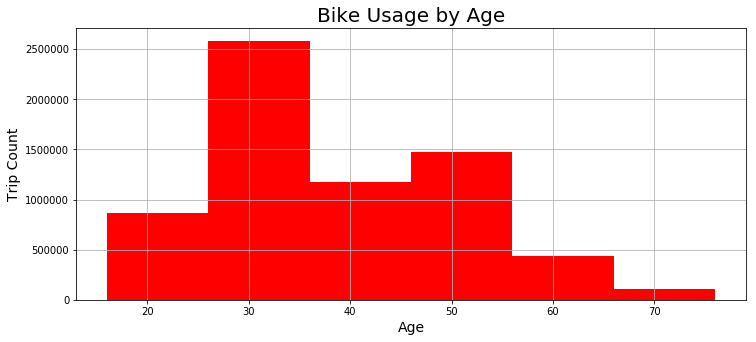

In [46]:
bins = np.arange(16, clean_df.age.max()+1, 10)
hour_day_bar = clean_df['age'].hist(bins=bins,color='red')
hour_day_bar.figure.set_size_inches(12, 5);
plt.title('Bike Usage by Age',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Trip Count',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('Bike-Usage-By-Age.png', bbox_inches='tight')

> almost trip taken by people around 30s years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There is no unusual points was found.But I found some intersting points as below:
* People use bike service in summer more than winter.
* People use bike service more in weekend. maybe people use for travel.
* But the peak hour are 5PM-6PM, so maybe people are use for work as well.
* Almost trip taken by male ( 2 times more than female )
* people around 30s years old are use this service a lot.
* Trips taken by Subcriber are 2 times more than Customer.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* I add some columns to analyze easier.(ex: age, week_day...)
* I remove some records that have unrealistic(outlier) human age.(ex: 147 years old)

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

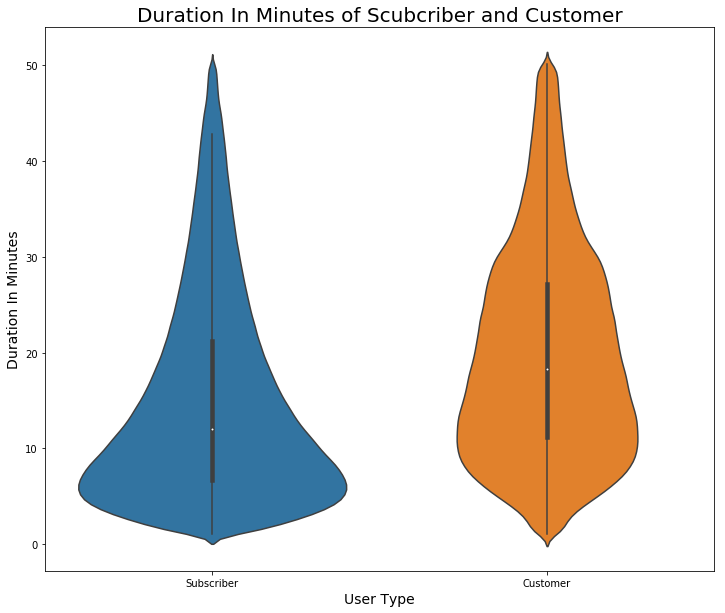

In [49]:
ax = sb.violinplot(x="usertype", y="duration_min", data=clean_df)
ax.figure.set_size_inches(12, 10);
plt.title('Duration In Minutes of Scubcriber and Customer',fontsize=20)
plt.xlabel('User Type',fontsize=14)
plt.ylabel('Duration In Minutes',fontsize=14)
plt.savefig('Duration-In-Minutes-of-Scubcriber-and-Customer.png', bbox_inches='tight')

> Almost trip of subcribers are around 8 minutes. Customers trips are longer.

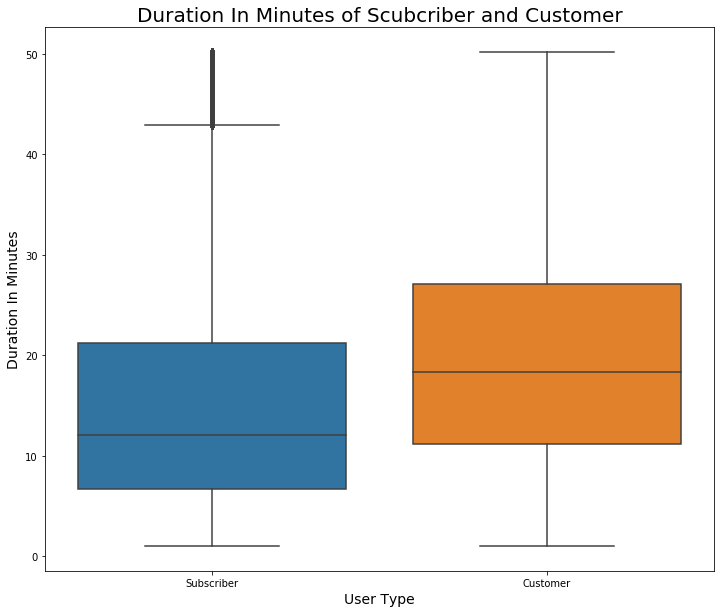

In [48]:
ax = sb.boxplot(x="usertype", y="duration_min", data=clean_df)
ax.figure.set_size_inches(12, 10);
plt.title('Duration In Minutes of Scubcriber and Customer',fontsize=20)
plt.xlabel('User Type',fontsize=14)
plt.ylabel('Duration In Minutes',fontsize=14)
plt.savefig('Duration-In-Minutes-of-Scubcriber-and-Customer-In-Boxplot.png', bbox_inches='tight')

> subcribers have shorter trip than customers(look at min, max, median )

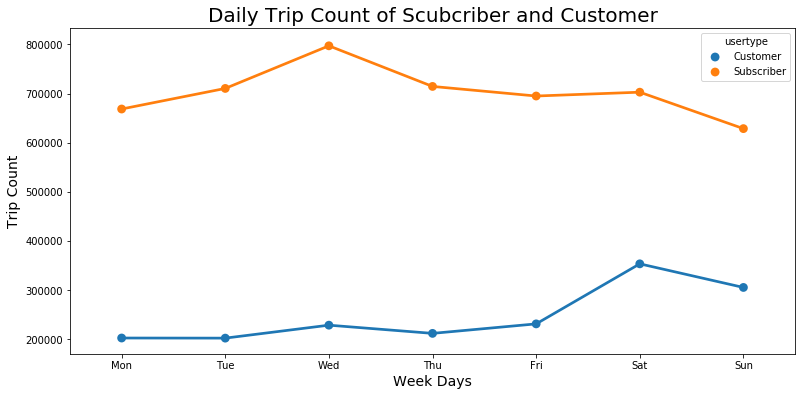

In [50]:
monthly_user_type_count_series = clean_df.groupby(["week_day", "usertype"]).size().reset_index()
plt.figure(figsize=(13,6))
ax = sb.pointplot(x='week_day',y=0, hue='usertype', scale=1, data=monthly_user_type_count_series,order=week_days)
plt.title('Daily Trip Count of Scubcriber and Customer',fontsize=20)
plt.xlabel('Week Days',fontsize=14)
plt.ylabel('Trip Count',fontsize=14)
plt.savefig('Daily-Trip-Count-of-Scubcriber-and-Customer.png', bbox_inches='tight')

> The peak trip count of Subcribers is working day (Wednesday).
>
> The peak trip count of Customers is weekend (Saturday)

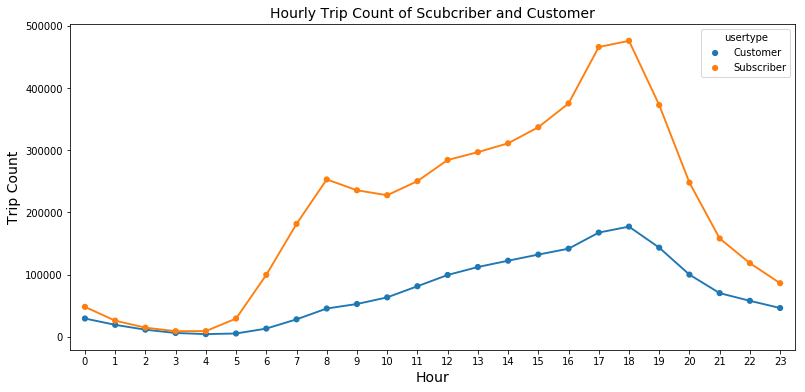

In [97]:
monthly_user_type_count_series = clean_df.groupby(["start_hour", "usertype"]).size().reset_index()
plt.figure(figsize=(13,6))
ax = sb.pointplot(x='start_hour', y=0, hue='usertype', scale=.7, data=monthly_user_type_count_series)
plt.title('Hourly Trip Count of Scubcriber and Customer',fontsize=14)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Trip Count',fontsize=14)
plt.savefig('Hourly-Trip-Count-of-Scubcriber-and-Customer.png', bbox_inches='tight')

> Subcriber and Customer have the same peak that is around 6PM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Subcribers have shorter trip than customers(median: 12 minutes vs 18 minutes)
* Maybe customers are tourism, so they take more duration time to travel.
* The peak trip count of Subcribers is weekend. 
* The peak trip count of Customers is Working day (Wednesday)
* Subcriber and Customer have the same peak that they use the service most around 6PM.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The peak of Subcribers are around 6PM, the time that people go back from work. So I think that Subcribers use this service for commuting to work. 
But then , I found that Subcribers used this service more in weekend.
So maybe they dont' just use for work but for other purpose too. (ex : go to supermaket, park...).

Customers are use this service most in weekdays , not weekend. So I guess tourism prefer come to New York on weekdays.


<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

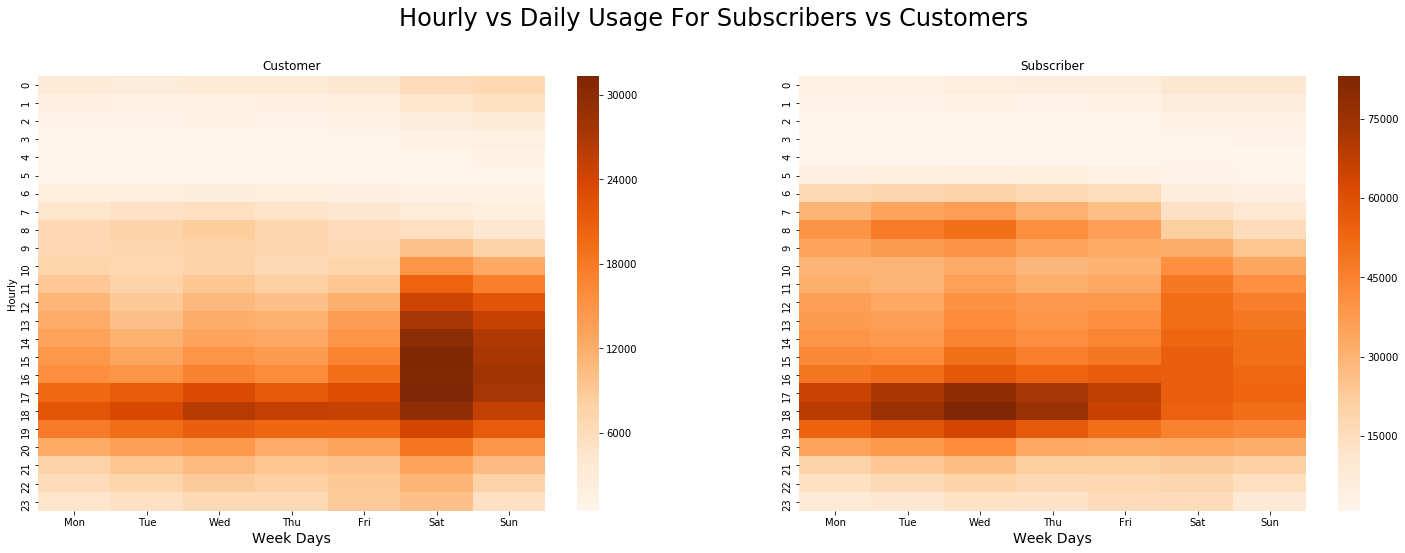

In [107]:
clean_df['week_day_sorted'] = pd.Categorical(clean_df['week_day'], ordered=True, categories=week_days)
plt.figure(figsize=(25,8))
plt.suptitle('Hourly vs Daily Usage For Subscribers vs Customers', fontsize = 24, y = 1)

#Customers
plt.subplot(1, 2, 1)
df_customer = clean_df.query('usertype == "Customer"').groupby(["start_hour", "week_day_sorted"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "week_day_sorted", "bikeid")
sb.heatmap(df_customer, cmap = 'Oranges')
plt.title("Customer")
plt.xlabel('Week Days', fontsize = 14)
plt.ylabel('Hourly')

#Subscribers
plt.subplot(1, 2, 2)
df_subscriber = clean_df.query('usertype == "Subscriber"').groupby(["start_hour", "week_day_sorted"])["bikeid"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_hour", "week_day_sorted", "bikeid")
sb.heatmap(df_subscriber, cmap="Oranges")
plt.title("Subscriber")
plt.xlabel('Week Days', fontsize = 14)
plt.ylabel('');

plt.savefig('Hourly-Daily-UserType.png', bbox_inches = 'tight')

> when put hourly and daily together , I found that :
* Customer: use this service most on weekend, and popular range time is very wide from 9AM - 6PM.
* Subcriber: use this service most on week days, and popular range time is 5PM - 6 PM

> with these result. I am sure that Customers are tourism and people who use bike for personal life ( not for commute to work )
And we can sure that Subcribers are people who use this service for commuting to work.

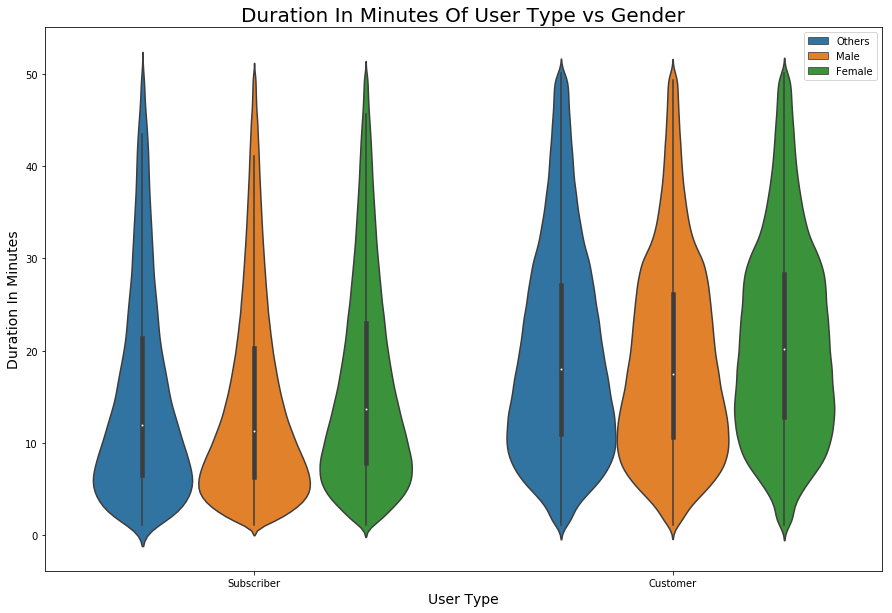

In [108]:
ax = sb.violinplot(x="usertype", y="duration_min", hue= 'gender', data=clean_df)
ax.figure.set_size_inches(15, 10);
ax.legend(handles=ax.legend_.legendHandles, labels=['Others','Male','Female'])
plt.title('Duration In Minutes Of User Type vs Gender',fontsize=20)
plt.xlabel('User Type',fontsize=14)
plt.ylabel('Duration In Minutes',fontsize=14)
plt.savefig('Duration-In-Minutes-Of-UserType-vs-Gender.png', bbox_inches = 'tight')

> Customers and Subcribers have the same thing that female strip is longer than male.

In [109]:
top_stations = clean_df['end station name'].value_counts()[:10].index.tolist()
top_stations

['12 Ave & W 40 St',
 'West St & Chambers St',
 'W 21 St & 6 Ave',
 '1 Ave & E 68 St',
 'Christopher St & Greenwich St',
 'Pier 40 - Hudson River Park',
 'E 17 St & Broadway',
 'Broadway & W 60 St',
 'E 13 St & Avenue A',
 'West St & Liberty St']

In [110]:
top_station_df = clean_df[clean_df['end station name'].isin(top_stations)]
top_station_df.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,age,trip_month,week_day,start_hour,end_hour,duration_min,week_day_sorted
27,1976,2020-07-01 00:01:40.017,2020-07-01 00:34:36.209,Hudson St & Reade St,12 Ave & W 40 St,39763,Subscriber,1993,1,27,7,Wed,0,0,32.933333,Wed
39,873,2020-07-01 00:02:23.618,2020-07-01 00:16:57.597,Mott St & Prince St,E 13 St & Avenue A,30956,Subscriber,1993,1,27,7,Wed,0,0,14.550000,Wed
62,2371,2020-07-01 00:03:31.802,2020-07-01 00:43:03.056,W 169 St & Fort Washington Ave,12 Ave & W 40 St,36992,Subscriber,1979,1,41,7,Wed,0,0,39.516667,Wed
107,639,2020-07-01 00:06:03.518,2020-07-01 00:16:42.916,8 Ave & W 33 St,Broadway & W 60 St,30671,Subscriber,1985,1,35,7,Wed,0,0,10.650000,Wed
110,336,2020-07-01 00:06:14.336,2020-07-01 00:11:50.419,Suffolk St & Stanton St,E 13 St & Avenue A,20162,Subscriber,1992,1,28,7,Wed,0,0,5.600000,Wed


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


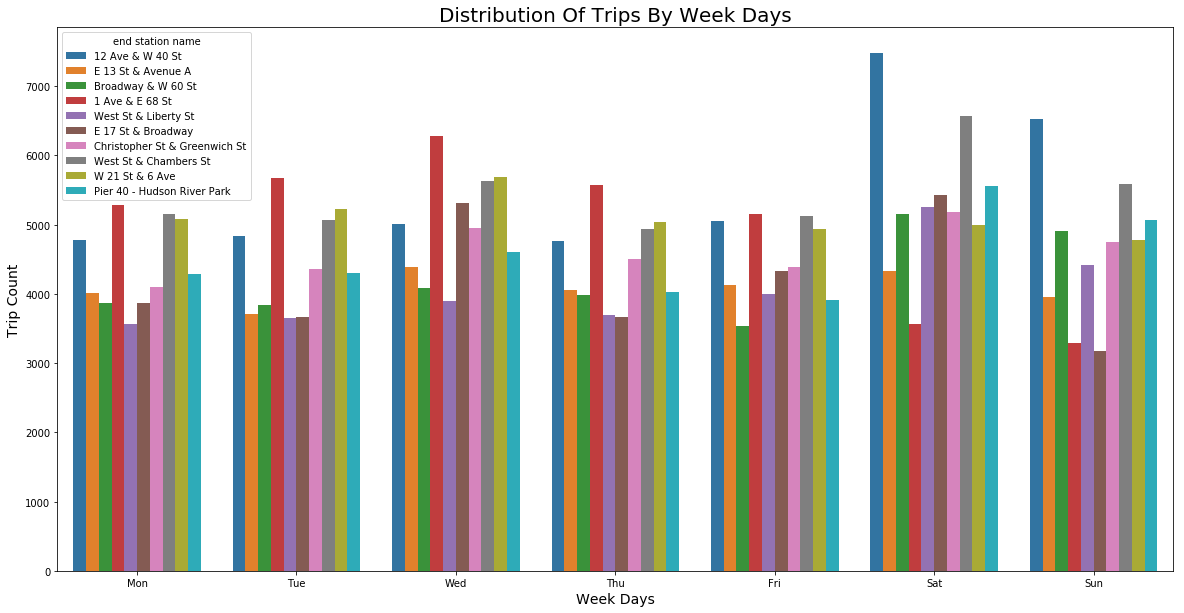

In [111]:
week_day_cats = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
top_station_df['week_day'] = top_station_df['week_day'].astype(week_day_cats)
#top_station_df['trip_count'] = top_station_df.groupby('week_day'].astype(week_day_cats)

ax = sb.countplot(data=top_station_df, x='week_day', hue='end station name')
ax.figure.set_size_inches(20, 10);
plt.xlabel('Week Days', fontsize=14)
plt.ylabel('Trip Count', fontsize=14)
plt.title("Distribution Of Trips By Week Days", fontsize=20);
plt.savefig('Distribution-Of-Trips-By-Week-Days.png', bbox_inches = 'tight')

> 12 Ave & 40 St Station are visited the most in weekends.Maybe this is the place for tourism.
>
> 1 Ave & E 68 St Station are visited the most in working days. Maybe this is the place for working.
>
> So in the next step I will check if Customer or Subcribes prefer to go to these Station.

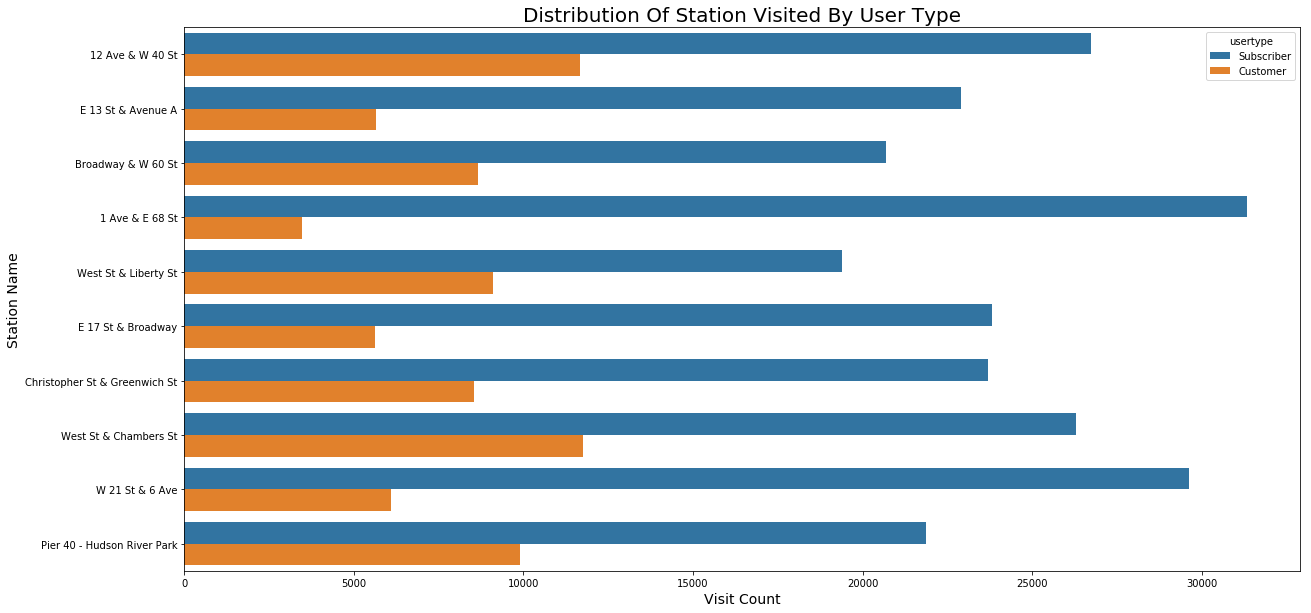

In [112]:
ax = sb.countplot(data=top_station_df, y='end station name', hue='usertype')
ax.figure.set_size_inches(20, 10);
plt.xlabel('Visit Count', fontsize=14)
plt.ylabel('Station Name', fontsize=14)
plt.title("Distribution Of Station Visited By User Type", fontsize=20);
plt.savefig('Distribution-Of-Station-Visited-By-UserType.png', bbox_inches = 'tight')

> Customers come 12 Ave & 40 St Station the most.
>
> Subcribers come 1 Ave & E 68 St Station the most.
> As I guess in the previous step that:
> * 12 Ave & 40 St Station are visited the most in weekends, so Customer who are tourism prefer to come this station.
> * 1 Ave & E 68 St Station are visited the most in working days, so Subcribers prefer to come this station.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
When we see the heatmap we can know that:
* Customers use this service most on weekend, and popular range time is very wide from 9AM - 6PM.I think they use bike for tourist/travel.
* Subcribers use this service most on week days, and popular range time is 5PM - 6 PM. I think they use bike for commuting to work.
### Were there any interesting or surprising interactions between features?

* Female trip is longer than male. I wonder because male ride faster or female stamina better !?! I will try to figure out that one day. 

<a id='conclusions'></a>
## Conclusions
#### After implement all above steps, I found that:
* People use bike service in summer more than winter.
* Customers use bike service more in weekend. maybe they are tourism and they use for traveling.
* Subcribers use bike service in working days. I think they use bike for commuting to work.
* Subcribers also use bike a lot in weekend. I think in New York bike become popular not only for working but for other things.  
* The peak hours are 5PM-6PM, this is the time when people get back from work.
* Almost trip taken by male ( 2 times more than female )
* people around 30s years old are use this service a lot.
* Trips taken by Subcriber are 2 times more than Customer.
* Subcribers and Customers's destination Stations are difference. Maybe they have difference purposes.
* Subcribers have shorter trip than customers(median: 12 minutes vs 18 minutes)
* Subcriber and Customer have the same peak that they use the service most around 6PM.